In [1]:
import numpy as np
import matplotlib.pyplot as plt
from inference_interface import multihist_to_template, template_to_multihist
from alea.utils import get_file_path
from alea.models import BlueiceExtendedModel

In [2]:
example_model_config_path = get_file_path("unbinned_ces_simple.yaml")
example_model = BlueiceExtendedModel.from_config(example_model_config_path)

Computing/loading models on one core: 100%|██████████| 15/15 [00:00<00:00, 311.02it/s]


In [3]:
example_model.get_expectation_values()

{'test_flat': 1000.0, 'test_gaussian': 1000.0, 'xe133': 1000.0004498392653}

In [4]:
source_name_list = example_model.get_source_name_list(likelihood_name="science_run_0")
source_name_list

['xe133', 'test_flat', 'test_gaussian']

In [5]:
data = example_model.generate_data()
example_model.data = data

In [6]:
result_hist = example_model.get_source_histograms(likelihood_name="science_run_0")["test_gaussian"]

In [7]:
np.sum(result_hist.histogram)

1.0

In [8]:
best_fit, max_ll = example_model.fit()
best_fit

{'livetime': 365.0,
 'xe133_rate_multiplier': 1024.7795002729029,
 'test_flat_rate_multiplier': 1014.2888196657489,
 'test_gaussian_rate_multiplier': 1011.9048437864011,
 'smearing_a': 24.82534683994875,
 'smearing_b': 1.4411748044711221}

2972
2936
3018


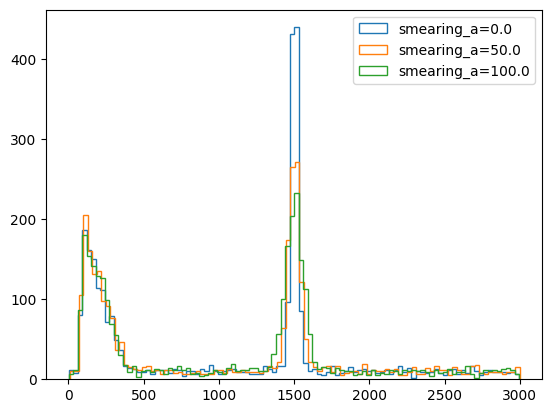

In [9]:
for smearing_a in np.linspace(0,100,3):
    data = example_model.generate_data(smearing_a=smearing_a)
    plt.hist(data["science_run_0"]["ces"],bins=100, histtype='step', label=f'smearing_a={smearing_a}')
    print(len(data["science_run_0"]["ces"]))
plt.legend()
plt.show()